In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("../data/supermarket-sales-data.csv")

In [6]:
data.shape

(1000, 11)

In [7]:
data.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [8]:
data.columns

Index(['InvoiceID', 'Branch', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Rating'],
      dtype='object')

In [9]:
# Invoice column does not provide any useful information
data.drop(columns=["InvoiceID"], inplace=True)

In [10]:
data.isnull().sum()

Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

In [11]:
data.dtypes

Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

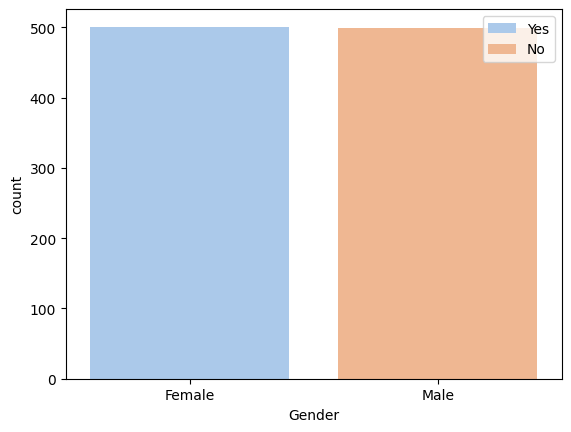

In [12]:
# Check for imbalance in the dataset
sns.barplot(
    x=data["Gender"].value_counts().index,
    y=data["Gender"].value_counts(),
    palette="pastel",
    hue=["Yes", "No"],
)

<Axes: xlabel='Rating', ylabel='Density'>

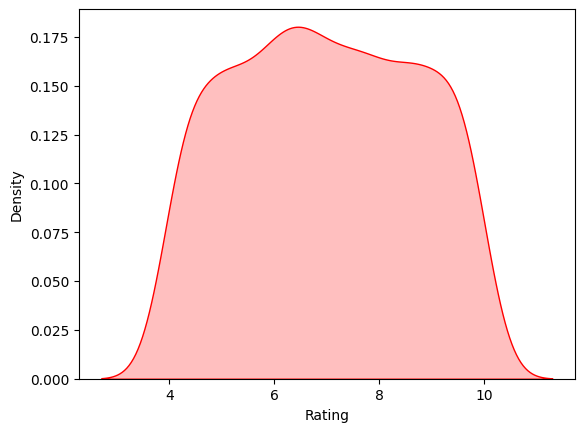

In [13]:
# Plot density for Rating column
sns.kdeplot(data["Rating"], fill=True, color="r")

<Axes: >

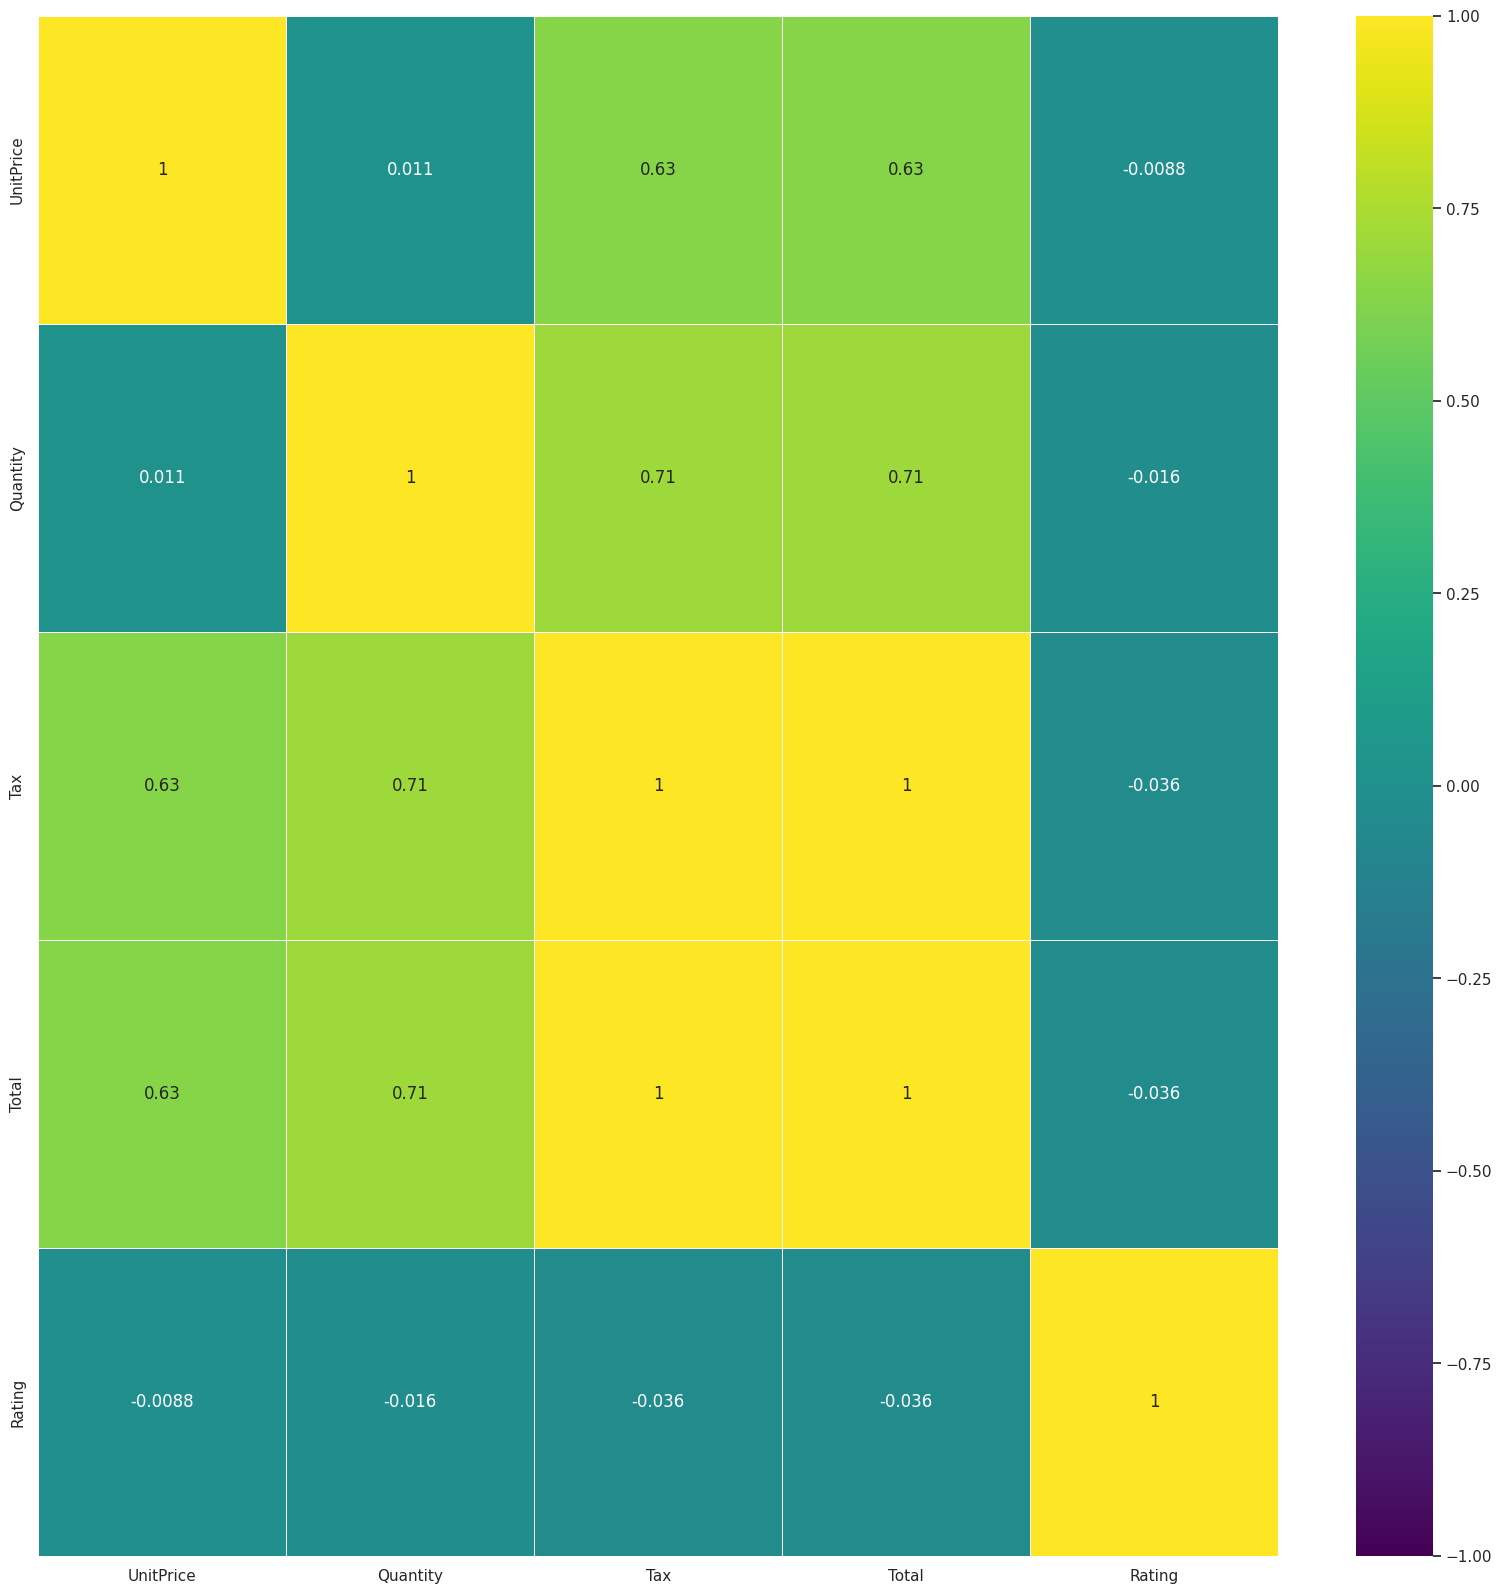

In [14]:
sns.set_theme(rc={"figure.figsize": (20, 20)})
sns.heatmap(
    data.select_dtypes(include=[int, float]).corr(),
    linewidths=0.5,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
)

# Check for outliers

<Axes: >

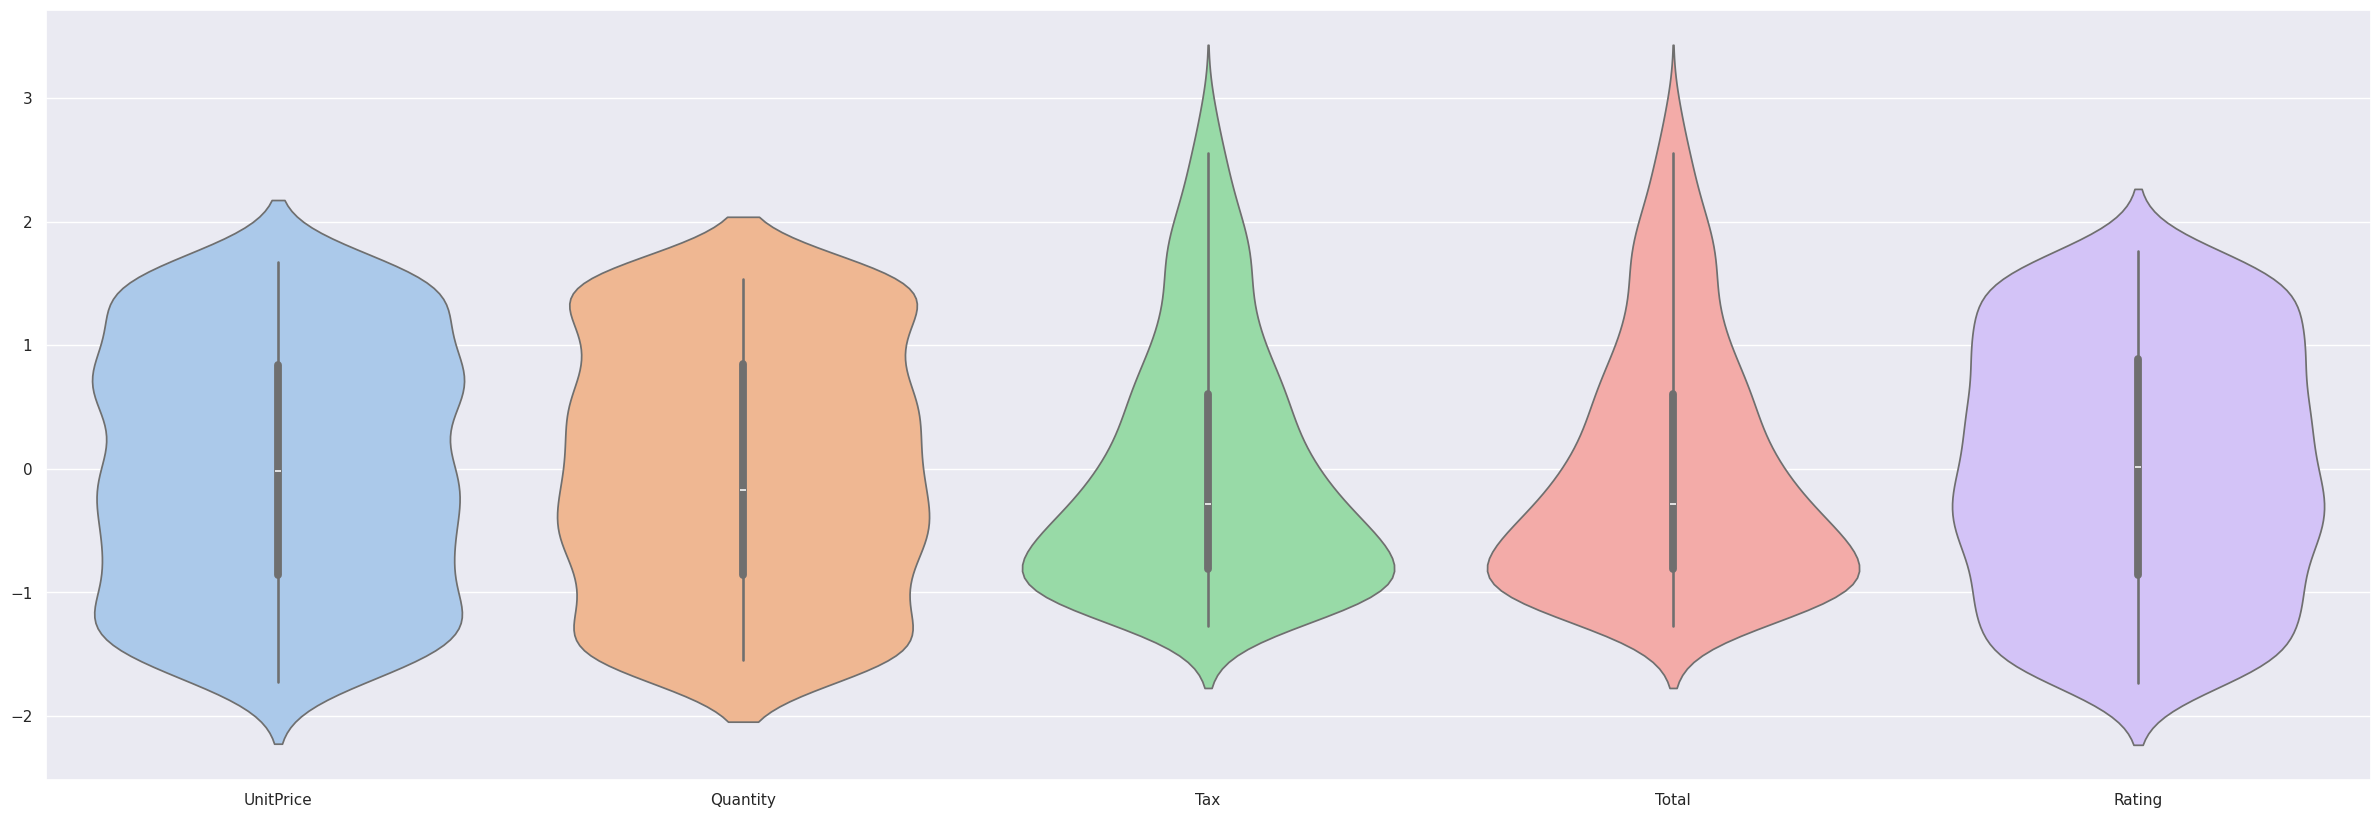

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[int, float]))
scaled_df = pd.DataFrame(
    scaled_data, columns=data.select_dtypes(include=[int, float]).columns
)
sns.set_theme(rc={"figure.figsize": (30, 10)})
sns.violinplot(data=scaled_df, palette="pastel", orient="v")

<Axes: >

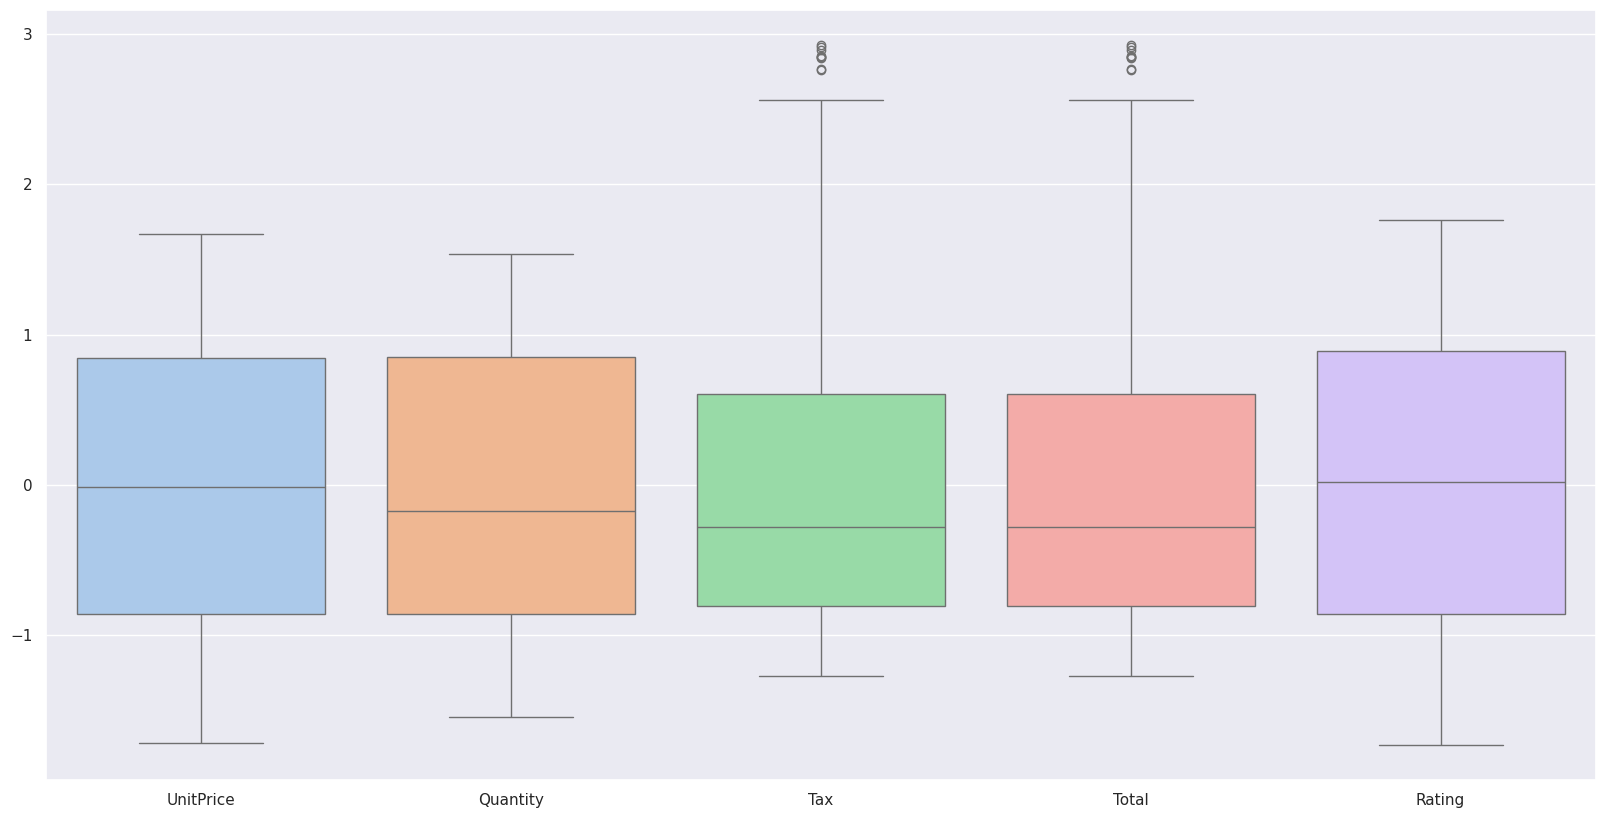

In [16]:
# Box plot for the scaled data
sns.set_theme(rc={"figure.figsize": (20, 10)})
sns.boxplot(data=scaled_df, palette="pastel", orient="v")

## Removing outliers using IQR

In [17]:
Q1 = scaled_df["Tax"].quantile(0.25)
Q3 = scaled_df["Tax"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = scaled_df[
    (scaled_df["Tax"] < lower_bound) | (scaled_df["Tax"] > upper_bound)
]

In [18]:
outliers

,UnitPrice,Quantity,Tax,Total,Rating
166,1.507016,1.536635,2.769436,2.769436,-1.264874
167,1.635408,1.536635,2.914699,2.914699,1.005577
350,1.647492,1.536635,2.928371,2.928371,-0.216974
357,1.501730,1.536635,2.763455,2.763455,-1.032007
422,1.568569,1.536635,2.839077,2.839077,1.005577
557,1.618038,1.536635,2.895046,2.895046,-1.439524
699,1.579520,1.536635,2.851467,2.851467,0.598060
792,1.574611,1.536635,2.845913,2.845913,-1.206657
996,1.574989,1.536635,2.846340,2.846340,-1.497741


In [19]:
# Remove outliers
scaled_df = scaled_df[
    (scaled_df["Tax"] >= lower_bound) & (scaled_df["Tax"] <= upper_bound)
]

<Axes: >

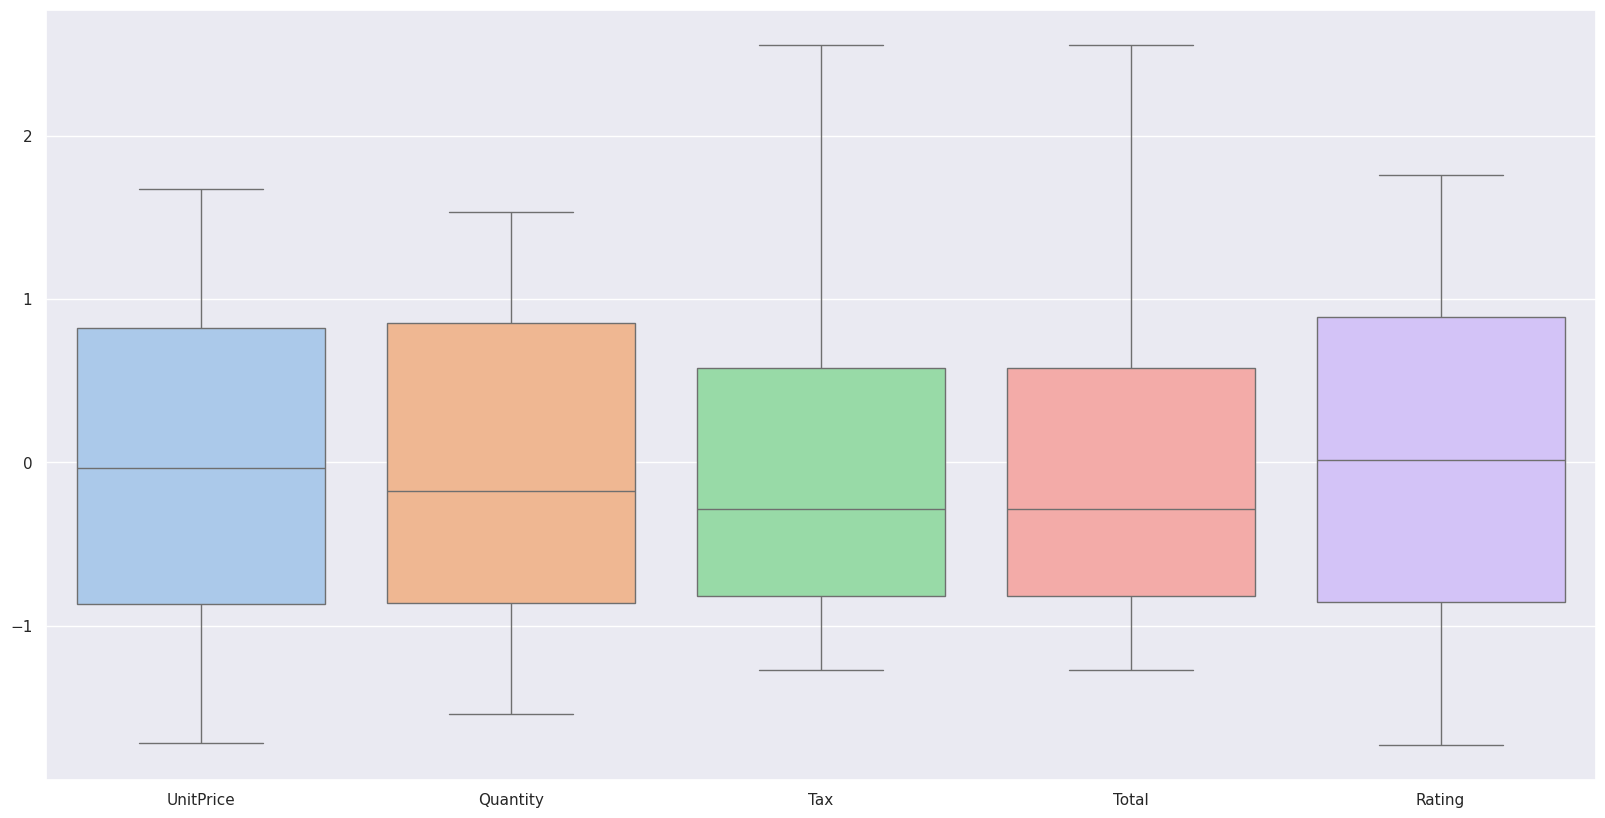

In [20]:
# Box plot for the scaled data
sns.set_theme(rc={"figure.figsize": (20, 10)})
sns.boxplot(data=scaled_df, palette="pastel", orient="v")

# Encode Categorical Data

In [21]:
# List all categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

['Branch', 'CustomerType', 'Gender', 'ProductType', 'PaymentType']

In [22]:
categorical_x_columns = (
    data.select_dtypes(include=["object"]).drop(["Gender"], axis=1).columns.tolist()
)

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_x_columns]).toarray()
encoded_df = pd.DataFrame(
    encoded_data, columns=encoder.get_feature_names_out(categorical_x_columns)
)
encoded_df.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
# Drop the original categorical columns
data = data.drop(categorical_x_columns, axis=1)
# Concatenate the original dataframe with the encoded dataframe
data = pd.concat([data, encoded_df], axis=1)
data.head()

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,Female,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Female,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Male,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Male,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Male,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
data.isnull().sum()

Gender                                0
UnitPrice                             0
Quantity                              0
Tax                                   0
Total                                 0
Rating                                0
Branch_A                              0
Branch_B                              0
Branch_C                              0
CustomerType_Member                   0
CustomerType_Normal                   0
ProductType_Electronic accessories    0
ProductType_Fashion accessories       0
ProductType_Food and beverages        0
ProductType_Health and beauty         0
ProductType_Home and lifestyle        0
ProductType_Sports and travel         0
PaymentType_Cash                      0
PaymentType_Credit card               0
PaymentType_UPI                       0
dtype: int64

In [26]:
# Label encode the Gender column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data["Gender"])
encoded_df = pd.DataFrame(encoded_data, columns=["Gender"])
encoded_df.head()

,Gender
0,0
1,0
2,1
3,1
4,1


In [27]:
# Drop the original categorical columns
data = data.drop("Gender", axis=1)
# Concatenate the original dataframe with the encoded dataframe
data = pd.concat([data, encoded_df], axis=1)
data.head()

,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,Gender
0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [28]:
data.dtypes

UnitPrice                             float64
Quantity                                int64
Tax                                   float64
Total                                 float64
Rating                                float64
Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                       float64
Gender                                  int64
dtype: object

In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, and test sets
train, test = train_test_split(data, test_size=0.20, random_state=42)

In [30]:
# Save the train, and test sets
train.to_csv("../data/train.csv", index=False)
test.to_csv("../data/test.csv", index=False)